## Ray Tracing

### 1) Modelling Reflection off a Spherical Mirror

In your 1st-year Physics lab, to understand the properties of optical systems, you probably drew rays through them. This technique is actually a real industrial one for studying the properties of real or proposed optical systems such as cameras, spectrographs, etc.

As a simple example, we will model the reflection of rays off a spherical mirror.

a) Start by defining the limits ot the system you will plot. We can take it to be a 2D cross-section through an optical system, extending from -5 to +5 on the x-axis and 0 to 10 on the y axis. Set the limits of the plot accordingly.

b) Then draw the mirror surface. We can take this to be an arc of the circle with centre (x, y) = (0,7), and radius 6, extending from -5 to 5 in x. You can either draw this parametrically or by calculating $y = f(x)$; you may want the latter form for subsequent calculations. I will call $y = f(x)$ the `equation of the surface'.

c) Then start a ray at the position (-4,10), and have it travel downwards vertically until it hits the mirror. At what coordinates does this happen? (Note "draw a ray" here really just means draw a line segment from the starting point to the ending point. If you wanted to get really fancy, you could animate the ray as it travels through the system, but we won't bother here. You might want to write a user-defined function that given a starting point, a direction, and a length, draws the required line segment.)

d) Once the ray hits the mirror, it should be reflected. The law of (specular) reflection says that the ray will be reflected *around* the normal to the mirror's surface at the reflection point. This means that the component parallel to the normal will be reversed, while the component perpendicular to the normal will remain unchanged. To perform this operation and get the reflected direction vector, you will first need to calculate the *normal vector* to the surface; this is the unit vector perpendicular to the *tangent* vector, which we saw can be calculated as a unit vector with a slope equal to the derivative of the function describing the surface.

e) Once you have the reflected vector, draw the reflected ray for some distance throught the system, say until it intersects the y axis or goes just past it.

f) Then repreat this operation for more downward-going rays, starting from points (-3,10), (-2,10), etc., across to (4,10).

g) Looking at the resulting system, what do you conclude about the abiltiy of spherical mirrors to focus light from infinity?

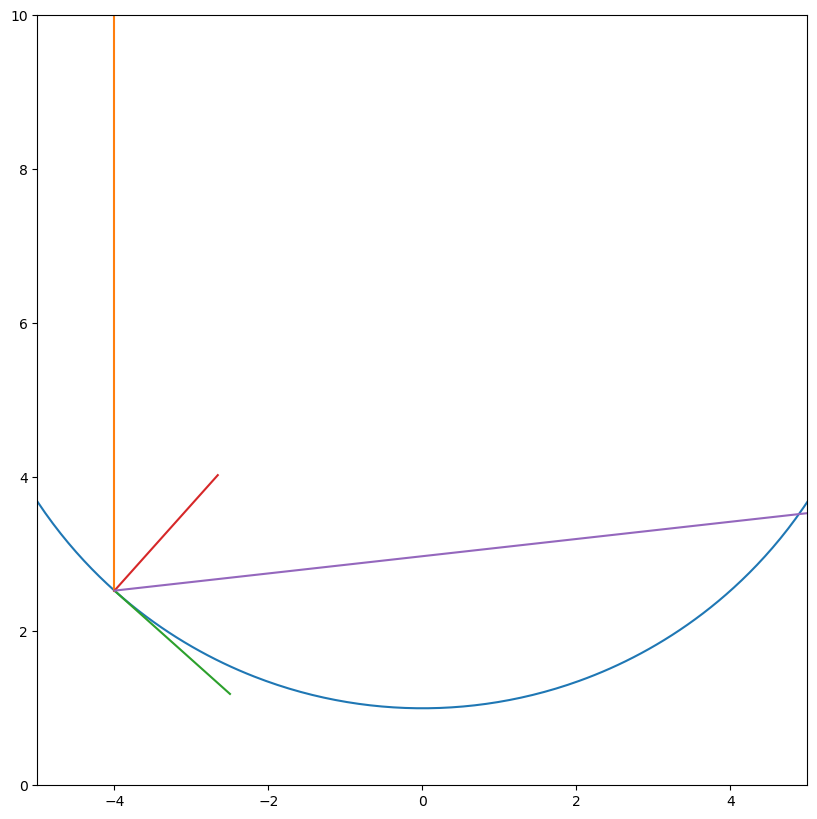

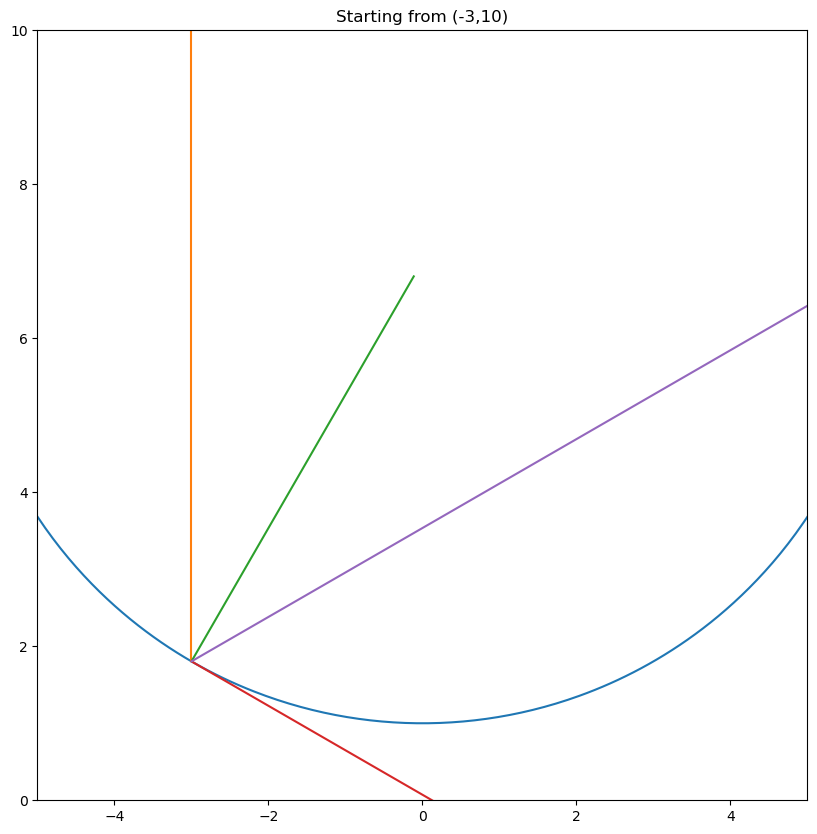

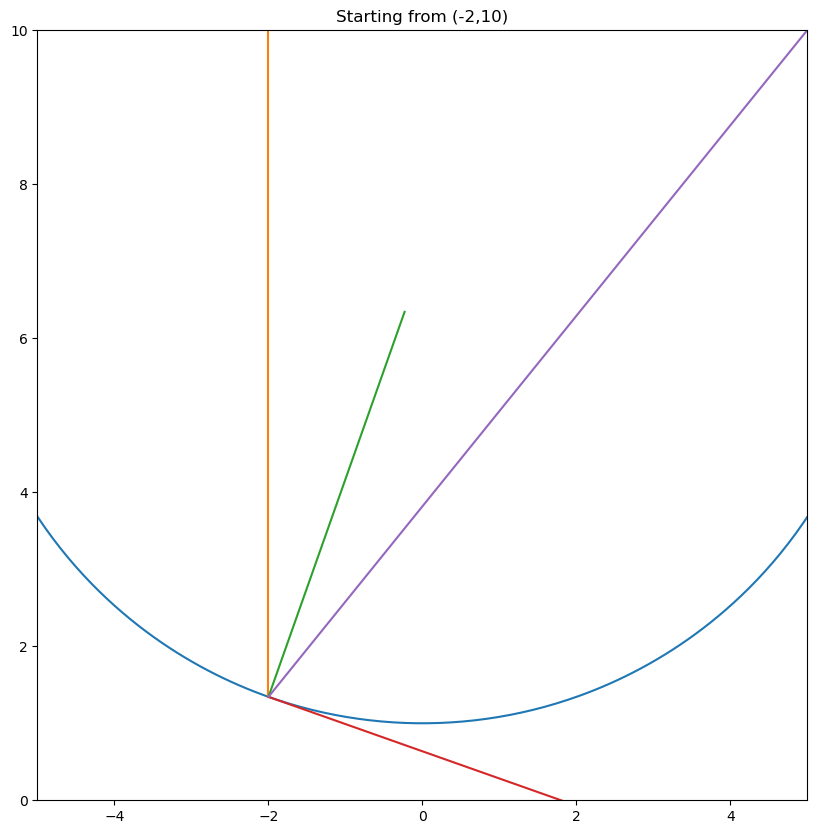

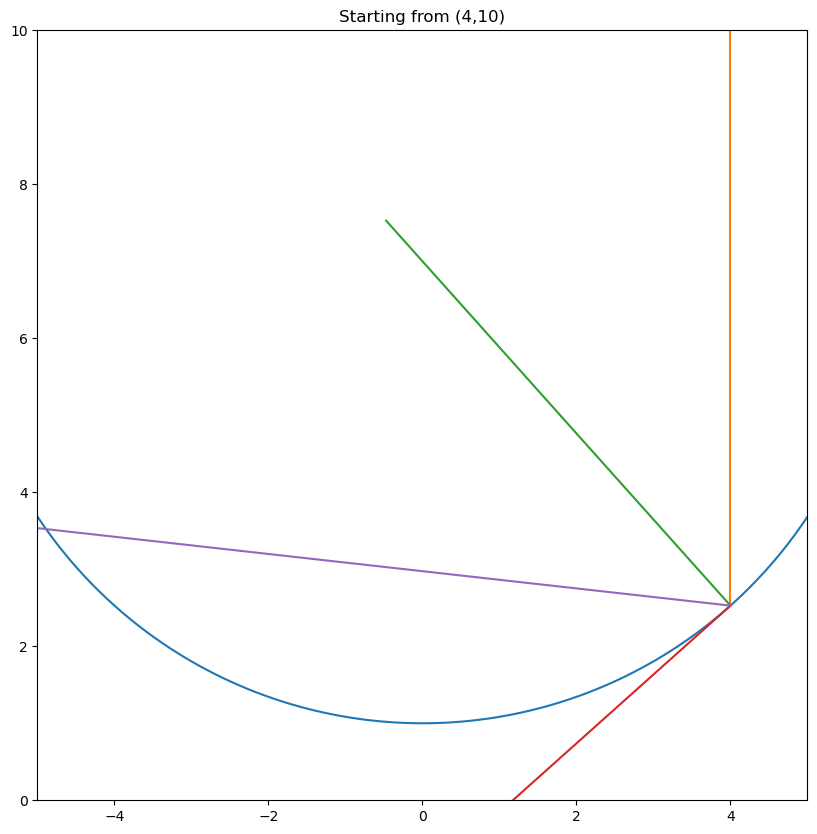

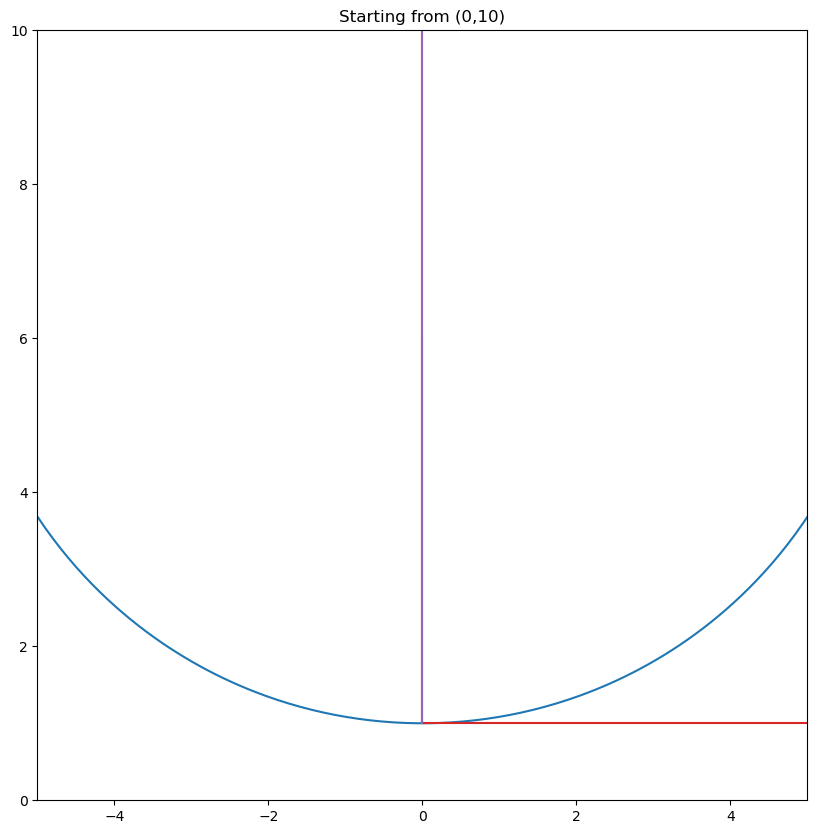

In [4]:
import matplotlib.pyplot as plt
import numpy as np
from math import sin,cos,tan,asin,acos,atan,pi

## a)
plt.rcParams['figure.figsize'] = [10,10]
plt.xlim(-5,5)
plt.ylim(0,10)
ax = plt.gca()
ax.set_aspect('equal')
# plt.show()

## b)
# x*x + (y-7)*(y-7) = 6*6
# (y-7)*(y-7) = 6*6- x*x
# abs(y-7) = sqrt(6*6- x*x)
# (y-7) = sqrt(6*6- x*x)
# (y-7) = -sqrt(6*6- x*x)
# y = 7-sqrt(6*6- x*x)
def f(x):
    return (7-np.sqrt(6*6- x*x))
N = 200
x = np.linspace(-5,5,N)
y = f(x)
plt.plot(x,y)
# plt.title('b) Spherical Mirror')
# plt.show()

## c) draw incident ray
def drawseg_pts(x0,y0,x1,y1):
    xp = [x0,x1]
    yp = [y0,y1]
    plt.plot(xp,yp)
    
def drawseg_vec(x0,y0,dx,dy,mult):
    xp = [x0,x0+mult*dx]
    yp = [y0,y0+mult*dy]
    plt.plot(xp,yp)

xv = -4
drawseg_pts(xv,10,xv,f(xv))
# plt.show()

## d)
def dfdx(x):
    return ((x/np.sqrt(6*6 - x*x)))

slope = dfdx(xv)
xp = xv
yp = f(xv)
dx = 0.1
dy = slope*dx
mult = 15
drawseg_vec(xp,yp,dx,dy,mult)
## if [x0,y0] and [x1,y1] are orthogonal, x0x1+y0y1 =0
## so y1 = -x0 x1=-y0
drawseg_vec(xp,yp,-dy,dx,mult)

## e)
test_l = np.array([-dy,dx])
test_v = np.array([0,1])
ref = 2*test_l@test_v/(np.linalg.norm(test_l)*np.linalg.norm(test_l))*test_l-test_v
drawseg_vec(xp,yp,ref[0],ref[1],50)
plt.show()


## f)
def ray(sp):
    # initialize the canvas
    s = 'Starting from ({0},10)'
    plt.rcParams['figure.figsize'] = [10,10]
    plt.title(s.format(sp))
    plt.xlim(-5,5)
    plt.ylim(0,10)
    ax = plt.gca()
    ax.set_aspect('equal')
    # initialize the x array
    N = 200
    x = np.linspace(-5,5,N)
    # initiallize the y array
    y = f(x)
    plt.plot(x,y)
    # set the x value of incident ray starting
    xv = sp
    # plot the incident ray
    drawseg_pts(xv,10,xv,f(xv))
    # calculate the data for normal line
    slope = dfdx(xv)
    xp = xv
    yp = f(xv)
    dx = 0.1
    dy = slope*dx
    mult = 50
    # draw the normal
    drawseg_vec(xp,yp,-dy,dx,mult)
    # calculate the reflection
    normal_l = np.array([-dy,dx])
    incident_v = np.array([0,1])
    ref = 2*normal_l@incident_v/(np.linalg.norm(normal_l)*np.linalg.norm(normal_l))*normal_l-incident_v
    dx_r = ref[0]
    dy_r = ref[1]
    # plot the tangent line and reflection ray
    if sp < 0:
        drawseg_vec(xp,yp,dx,dy,mult)
        drawseg_vec(xp,yp,dx_r,dy_r,50)
    elif sp > 0:
        drawseg_vec(xp,yp,dx,dy,-mult)
        drawseg_vec(xp,yp,dx_r,dy_r,50)
    else:
        drawseg_vec(xp,yp,dx,dy,mult)
        drawseg_pts(xp,yp,xp,10)
    plt.show()

ray(-3)
ray(-2)
ray(4)
ray(0)

## g)
## Will converge the light together

### 2) Modelling Reflection off a Flat Mirror

Now try the same thing, with a flat mirror, i.e. one where the equation describing the surface is a linear equation. Assume a non-zero slope (i.e. a tilted mirror) for clarity. What do you find?

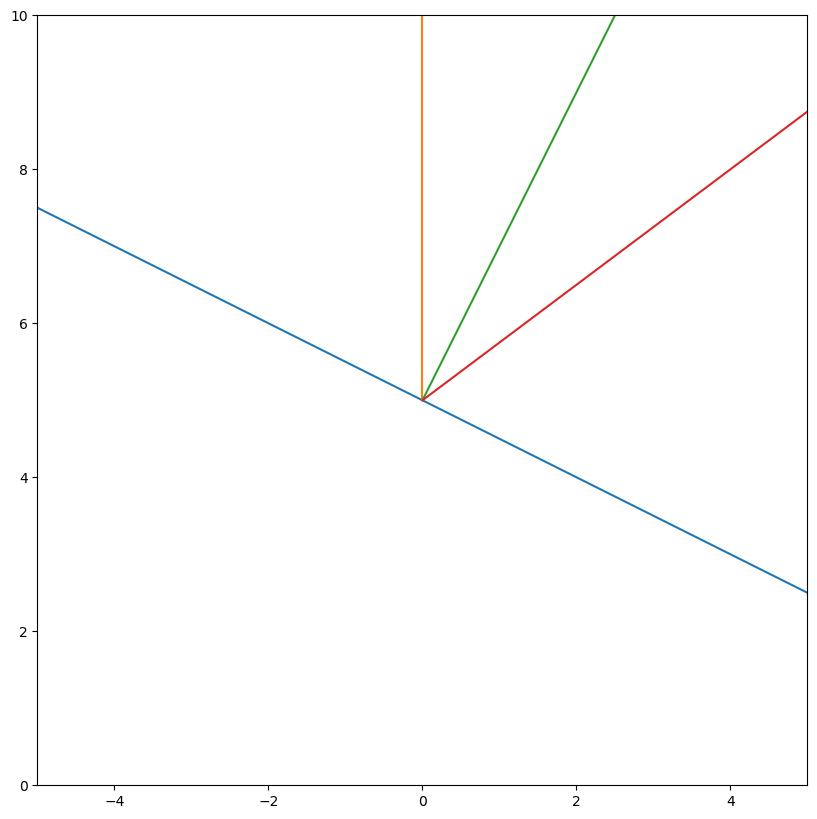

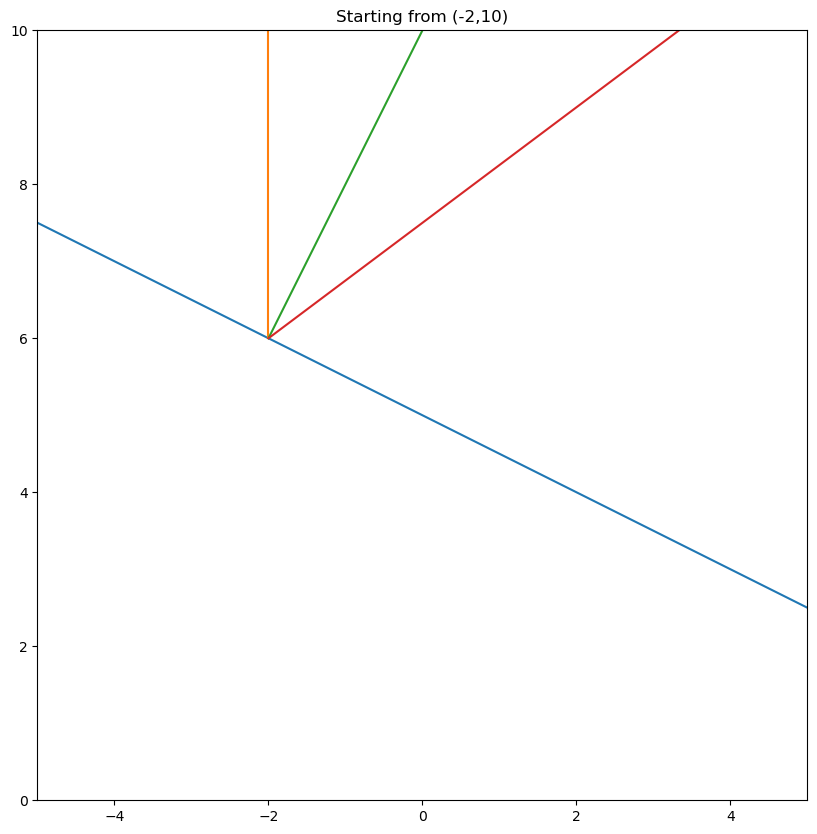

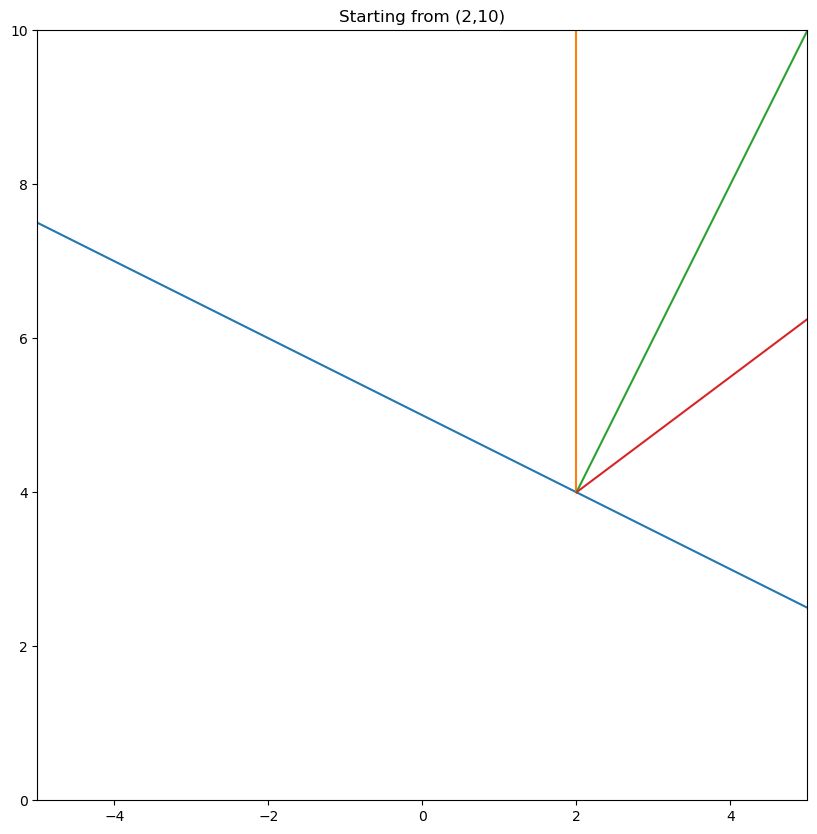

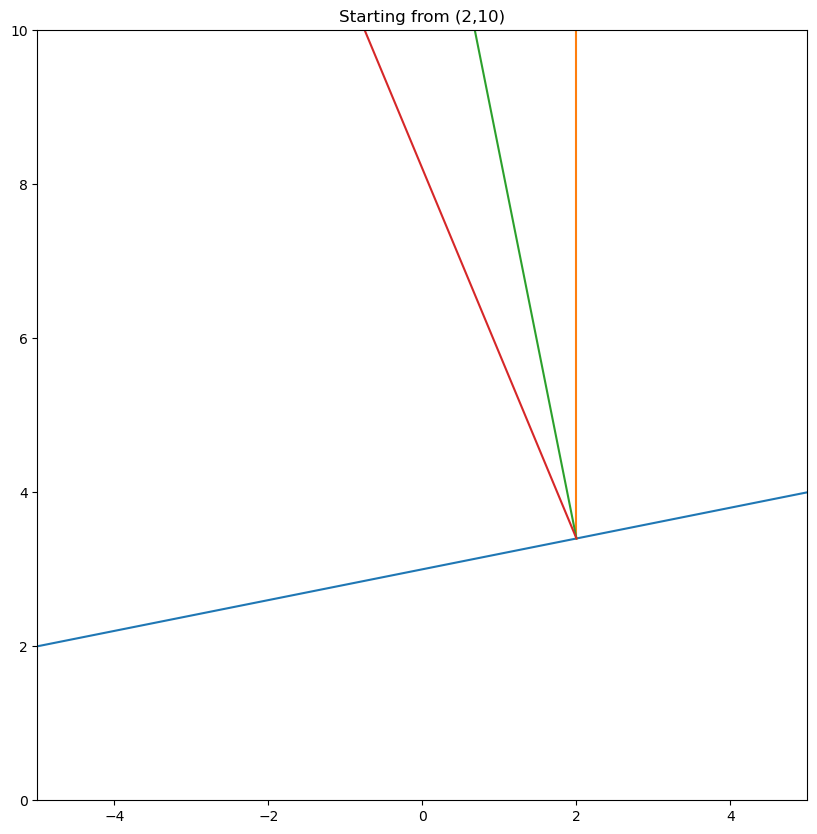

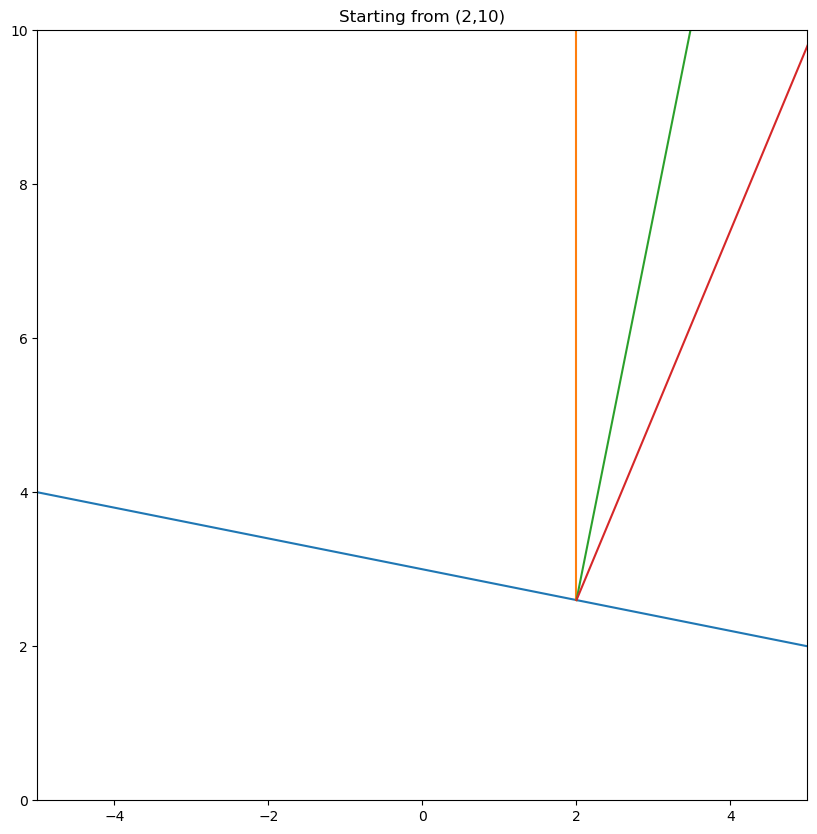

In [5]:
import matplotlib.pyplot as plt
import numpy as np
from math import sin,cos,tan,asin,acos,atan,pi

# define a function to describe the flat mirror
def flat(x,b,dx,dy):
    slope = dy/dx
    y = slope*x+b
    return y

# initialize the canvas
plt.rcParams['figure.figsize'] = [10,10]
plt.xlim(-5,5)
plt.ylim(0,10)
ax = plt.gca()
ax.set_aspect('equal')
# initialize the x array
N = 200
x_1 = np.linspace(-5,5,N)
d_x = -2
d_y = 1
intersection = 5
mult_1 = 15
# initiallize the y array
y_1 = flat(x_1,intersection,d_x,d_y)
plt.plot(x_1,y_1)
# set the x value of incident ray starting
xv_1 = 0
# plot the incident ray
drawseg_pts(xv_1,10,xv_1,flat(xv_1,intersection,d_x,d_y))
xp_1 = xv_1
yp_1 = flat(xv_1,intersection,d_x,d_y)
# calculate the dx dy for reflection
slope_1 = d_y/d_x
normal_l = np.array([-d_y,d_x])
incident_v = np.array([0,1])
ref = 2*normal_l@incident_v/(np.linalg.norm(normal_l)*np.linalg.norm(normal_l))*normal_l-incident_v
if slope_1 < 0:
    # plot normal line
    drawseg_vec(xv_1,yp_1,-d_y,d_x,-mult_1)
    drawseg_vec(xp_1,yp_1,ref[0],ref[1],50)
elif slope_1 > 0:
    # plot normal line
    drawseg_vec(xv_1,yp_1,-d_y,d_x,mult_1)
    drawseg_vec(xp_1,yp_1,ref[0],ref[1],50)
else:
    print('zero slope')
plt.show()

def flat_mirrot(sp):
    # initialize the canvas
    s = 'Starting from ({0},10)'
    plt.rcParams['figure.figsize'] = [10,10]
    plt.title(s.format(sp))
    plt.xlim(-5,5)
    plt.ylim(0,10)
    ax = plt.gca()
    ax.set_aspect('equal')
    N = 200
    x_1 = np.linspace(-5,5,N)
    d_x = -2
    d_y = 1
    intersection = 5
    mult_1 = 15
    # initiallize the y array
    y_1 = flat(x_1,intersection,d_x,d_y)
    plt.plot(x_1,y_1)
    # set the x value of incident ray starting
    xv_1 = sp
    # plot the incident ray
    drawseg_pts(xv_1,10,xv_1,flat(xv_1,intersection,d_x,d_y))
    xp_1 = xv_1
    yp_1 = flat(xv_1,intersection,d_x,d_y)
    # calculate the dx dy for reflection
    slope_1 = d_y/d_x
    normal_l = np.array([-d_y,d_x])
    incident_v = np.array([0,1])
    ref = 2*normal_l@incident_v/(np.linalg.norm(normal_l)*np.linalg.norm(normal_l))*normal_l-incident_v
    dx_r = ref[0]
    dy_r = ref[1]
    if slope_1 < 0:
        # plot normal line
        drawseg_vec(xv_1,yp_1,-d_y,d_x,-mult_1)
        drawseg_vec(xp_1,yp_1,dx_r,dy_r,50)
    elif slope_1 > 0:
        # plot normal line
        drawseg_vec(xv_1,yp_1,-d_y,d_x,mult_1)
        drawseg_vec(xp_1,yp_1,dx_r,dy_r,50)
    else:
        print('zero slope')
    plt.show()

flat_mirrot(-2)
flat_mirrot(2)

def general_flat_mirrot(dx,dy,inter,sp):
    # initialize the canvas
    s = 'Starting from ({0},10)'
    plt.rcParams['figure.figsize'] = [10,10]
    plt.title(s.format(sp))
    plt.xlim(-5,5)
    plt.ylim(0,10)
    ax = plt.gca()
    ax.set_aspect('equal')
    # # initialize the variables in the function
    N = 200
    x_1 = np.linspace(-5,5,N)
    d_x = dx
    d_y = dy
    intersection = inter
    mult_1 = 15
    # initiallize the y array
    y_1 = flat(x_1,intersection,d_x,d_y)
    plt.plot(x_1,y_1)
    # set the x value of incident ray starting
    xv_1 = sp
    # plot the incident ray
    drawseg_pts(xv_1,10,xv_1,flat(xv_1,intersection,d_x,d_y))
    xp_1 = xv_1
    yp_1 = flat(xv_1,intersection,d_x,d_y)
    # calculate the dx dy for reflection
    slope_1 = d_y/d_x
    normal_l = np.array([-d_y,d_x])
    incident_v = np.array([0,1])
    ref = 2*normal_l@incident_v/(np.linalg.norm(normal_l)*np.linalg.norm(normal_l))*normal_l-incident_v
    dx_r = ref[0]
    dy_r = ref[1]
    if slope_1 < 0:
        # plot normal line
        drawseg_vec(xv_1,yp_1,-d_y,d_x,-mult_1)
        drawseg_vec(xp_1,yp_1,dx_r,dy_r,50)
    elif slope_1 > 0:
        # plot normal line
        drawseg_vec(xv_1,yp_1,-d_y,d_x,mult_1)
        drawseg_vec(xp_1,yp_1,dx_r,dy_r,50)
    else:
        print('zero slope')
    plt.show()

general_flat_mirrot(5,1,3,2)
general_flat_mirrot(-5,1,3,2)

## It can be found that if the incident light is parallel, the reflected light 
## after passing through the plane mirror is still parallel

### 3) Modelling Reflection off a Parabolic Mirror

Finally, try the same thing, with a *parabolic* mirror, i.e. one where the equation describing the surface is a quadratic equation of the form $y = ax^2,\ \ a > 0$. Compare the results to question 1.

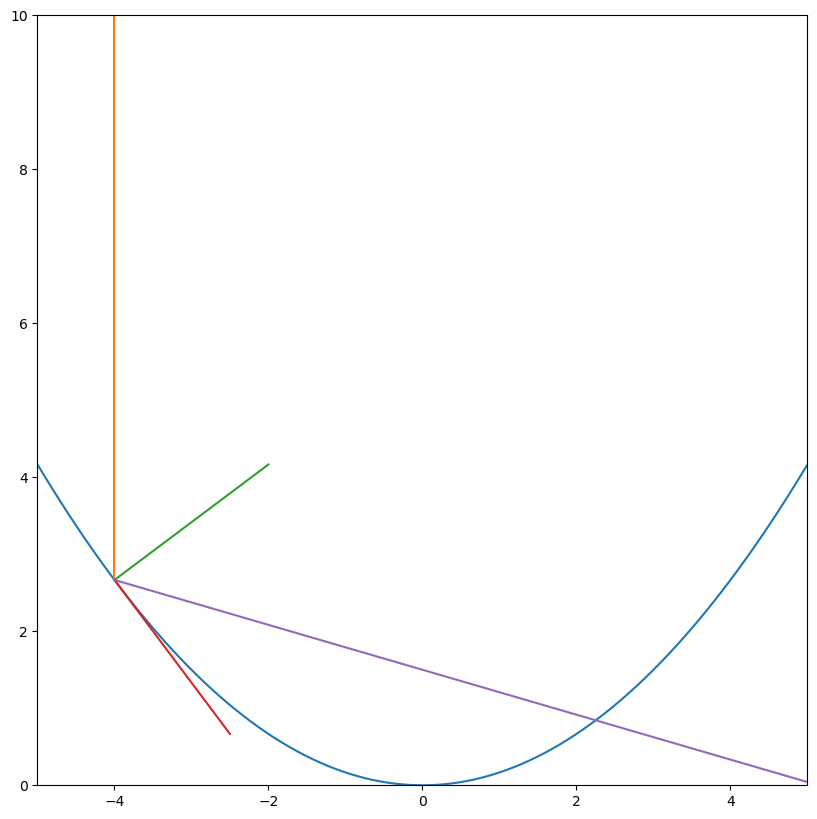

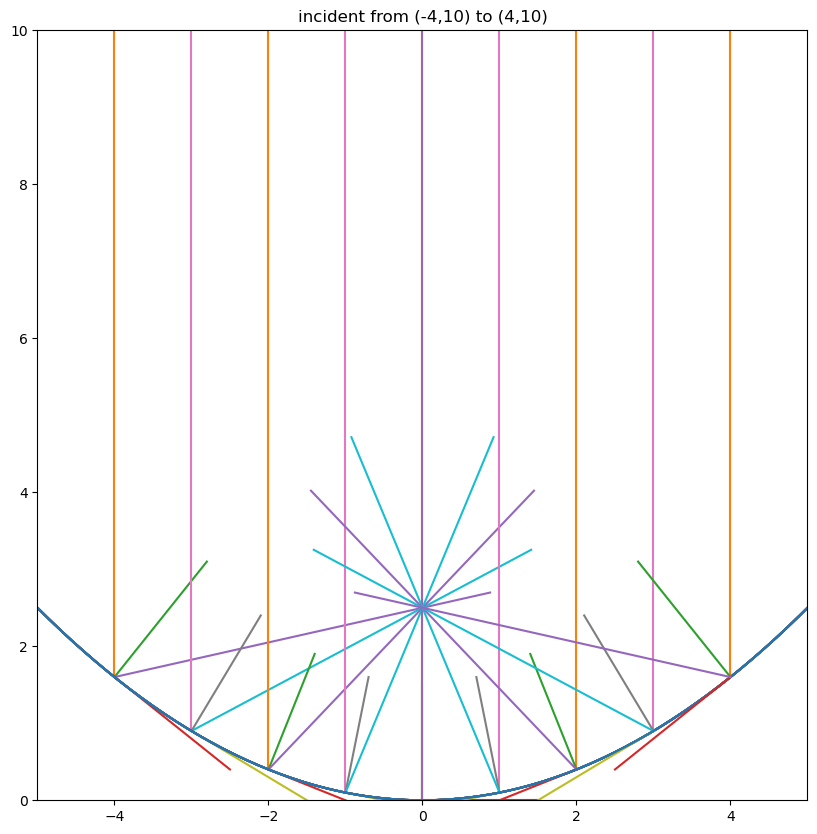

In [6]:
# define a function describe a Parabolic curve
def parabolic(x,a):
    y = a*x*x
    return y

def d_parabolic(x,a):
    dydx = 2*a*x
    return dydx

# initialize the canvas
plt.rcParams['figure.figsize'] = [10,10]
plt.xlim(-5,5)
plt.ylim(0,10)
ax = plt.gca()
ax.set_aspect('equal')
# initialize the x array and set variables
a_0 = 1/6
xv_2 = -4
N = 200
x_2 = np.linspace(-5,5,N)
# initialize the y array
y_2 = parabolic(x_2,a_0)
# plot the parabola
plt.plot(x_2,y_2)
# set the starting point
xp_2 = xv_2
yp_2 = parabolic(xv_2,a_0)
# plot the incident ray
drawseg_pts(xp_2,10,xp_2,yp_2)
# calculate for normal line
slope_2 = d_parabolic(xp_2,a_0)
dx_2 = 0.1
dy_2 = slope_2*dx_2
mult_2 = 15
# plot the normal line
drawseg_vec(xp_2,yp_2,-dy_2,dx_2,mult_2)
# reflection dx dy
normal_l = np.array([-dy_2,dx_2])
incident_v = np.array([0,1])
ref = 2*normal_l@incident_v/(np.linalg.norm(normal_l)*np.linalg.norm(normal_l))*normal_l-incident_v
dx_r = ref[0]
dy_r = ref[1]
# plot the tangent line and the reflected ray
if xv_2 > 0:
    drawseg_vec(xp_2,yp_2,dx_2,dy_2,-mult_2)
    drawseg_vec(xp_2,yp_2,dx_r,dy_r,50)
elif xv_2 < 0:
    drawseg_vec(xp_2,yp_2,dx_2,dy_2,mult_2)
    drawseg_vec(xp_2,yp_2,dx_r,dy_r,50)
else:
    drawseg_vec(xp_2,yp_2,dx_2,dy_2,mult_2)
    drawseg_pts(xp_2,yp_2,xv_2,10)
plt.show()

## define a function plot the graph depends on the starting point sp
## and the constant a contributed to y=ax^2
def para_ray(sp,a):
    # initialize the canvas
    plt.rcParams['figure.figsize'] = [10,10]
    plt.title('incident from (-4,10) to (4,10)')
    plt.xlim(-5,5)
    plt.ylim(0,10)
    ax = plt.gca()
    ax.set_aspect('equal')
    # initialize the x array and set variables
    a_0 = a
    xv_2 = sp
    N = 200
    x_2 = np.linspace(-5,5,N)
    # initialize the y array
    y_2 = parabolic(x_2,a_0)
    # plot the parabola
    plt.plot(x_2,y_2)
    # set the starting point
    xp_2 = xv_2
    yp_2 = parabolic(xv_2,a_0)
    # plot the incident ray
    drawseg_pts(xp_2,10,xp_2,yp_2)
    # calculate for normal line
    slope_2 = d_parabolic(xp_2,a_0)
    dx_2 = 0.1
    dy_2 = slope_2*dx_2
    mult_2 = 15
    # plot the normal line
    drawseg_vec(xp_2,yp_2,-dy_2,dx_2,mult_2)
    ## reflection dx dy
    normal_l = np.array([-dy_2,dx_2])
    incident_v = np.array([0,1])
    ref = 2*normal_l@incident_v/(np.linalg.norm(normal_l)*np.linalg.norm(normal_l))*normal_l-incident_v
    dx_r = ref[0]
    dy_r = ref[1]
    # plot the tangent line and the reflected ray
    if xv_2 > 0:
        drawseg_vec(xp_2,yp_2,dx_2,dy_2,-mult_2)
        drawseg_vec(xp_2,yp_2,dx_r,dy_r,5)
    elif xv_2 < 0:
        drawseg_vec(xp_2,yp_2,dx_2,dy_2,mult_2)
        drawseg_vec(xp_2,yp_2,dx_r,dy_r,5)
    else:
        drawseg_vec(xp_2,yp_2,dx_2,dy_2,mult_2)
        drawseg_pts(xp_2,yp_2,xv_2,10)

for i in range(-4,5):
    para_ray(i,1/10)
plt.show()

## Parabolic Mirror will also converge the light, but compared with the 
## Spherical Mirror in part a. The light of Parabolic Mirror will converge to a point. 
## The Spherical Mirror will converge the light but not to a single point.